Домашнее задание 1

Масштабирование: а. Нормализовать признак - median_income б. Привести признак - population к масштабу от 0 до 100

In [1]:
import pandas as pd

housing = pd.read_csv('data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
#вариант 1:просто создаем массив с нормализованными значениями
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
median_income_norm = min_max_scaler.fit_transform(housing[['median_income']])
median_income_norm

array([[0.53966842],
       [0.53802706],
       [0.46602805],
       ...,
       [0.08276438],
       [0.09429525],
       [0.13025338]])

In [3]:
#вариант 2: замещаем значения в таблице housing1 на нормализованные
housing1 = pd.read_csv('data/housing.csv')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
housing1[['median_income']] = scaler.fit_transform(housing1[['median_income']])
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,0.539668,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,0.538027,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,0.466028,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,0.354699,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,0.230776,342200.0,NEAR BAY


In [4]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
population_norm = min_max_scaler.fit_transform(housing[['population']])
population_norm

array([[0.89408335],
       [6.72104039],
       [1.38176518],
       ...,
       [2.81398021],
       [2.06844362],
       [3.87903248]])

In [5]:
scaler = MinMaxScaler(feature_range=(0,100))
housing1[['population']] = scaler.fit_transform(housing1[['population']])
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,0.894083,126.0,0.539668,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,6.721040,1138.0,0.538027,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,1.381765,177.0,0.466028,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,1.555537,219.0,0.354699,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,1.575156,259.0,0.230776,342200.0,NEAR BAY


In [6]:
housing1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,3.986874,499.539680,0.232464,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,3.174030,382.329753,0.131020,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,2.197371,280.000000,0.142308,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,3.259621,409.000000,0.209301,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,4.826368,605.000000,0.292641,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,100.000000,6082.000000,1.000000,500001.000000


Заполнение пропусков: а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

In [7]:
housing2 = pd.read_csv('data/housing.csv')

In [8]:
t_bdrms_mean_by_location = housing2[['ocean_proximity', 'total_bedrooms']].groupby('ocean_proximity').mean().reset_index()
t_bdrms_mean_by_location

,ocean_proximity,total_bedrooms
0,<1H OCEAN,546.539185
1,INLAND,533.881619
2,ISLAND,420.400000
3,NEAR BAY,514.182819
4,NEAR OCEAN,538.615677


In [10]:
housing2.total_bedrooms.value_counts(dropna = False).iloc[:5]

NaN       207
 280.0     55
 331.0     51
 345.0     50
 393.0     49
Name: total_bedrooms, dtype: int64

In [11]:
import math

def total_bedrooms_new(row):
    if math.isnan(row['total_bedrooms']):
        if row.ocean_proximity == 'NEAR BAY':
            return t_bdrms_mean_by_location.total_bedrooms[ t_bdrms_mean_by_location.ocean_proximity == 'NEAR BAY' ]
        elif row.ocean_proximity == '<1H OCEAN':
            return t_bdrms_mean_by_location.total_bedrooms[ t_bdrms_mean_by_location.ocean_proximity == '<1H OCEAN' ]
        elif row.ocean_proximity == 'INLAND':
            return t_bdrms_mean_by_location.total_bedrooms[ t_bdrms_mean_by_location.ocean_proximity == 'INLAND' ]        
        elif row.ocean_proximity == 'ISLAND':
            return t_bdrms_mean_by_location.total_bedrooms[ t_bdrms_mean_by_location.ocean_proximity == 'ISLAND' ]       
        else:
            return t_bdrms_mean_by_location.total_bedrooms[ t_bdrms_mean_by_location.ocean_proximity == 'NEAR OCEAN' ]
    else:
        return row.total_bedrooms
#почему не работает синтаксис if row['total_bedrooms'].isnull()?

In [12]:
housing2['total_bedrooms_new'] = housing2.apply(total_bedrooms_new, axis=1)
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_new
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,190
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,235
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,280


In [15]:
#del housing2['total_bedrooms']
#housing2
housing2.drop(['total_bedrooms'], axis='columns', inplace=True)
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_new
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,190
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,235
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,280


Категорийные атрибуты: а. Посчитать среднее кол-во комнат в строке (total_rooms/households) б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [19]:
def rooms_averige_number(row):
    return row.total_rooms/row.households

In [20]:
housing['rooms_averige_number'] = housing.apply(rooms_averige_number, axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_averige_number
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [21]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_averige_number
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091


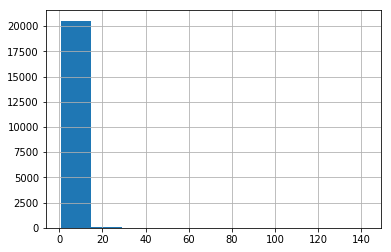

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.rooms_averige_number.hist()

(array([87., 22.,  4.,  6.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 14.        ,  26.79090909,  39.58181818,  52.37272727,
         65.16363636,  77.95454545,  90.74545455, 103.53636364,
        116.32727273, 129.11818182, 141.90909091]),
 <a list of 10 Patch objects>)

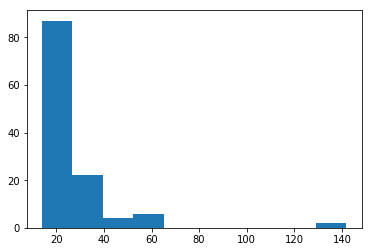

In [23]:
rooms_av_number = housing['rooms_averige_number']
plt.hist(rooms_av_number[rooms_av_number>=14])

(array([  67., 1056., 6166., 8432., 3638.,  889.,  168.,   61.,   27.,
          15.]),
 array([ 0.84615385,  2.16008919,  3.47402453,  4.78795987,  6.10189521,
         7.41583055,  8.72976589, 10.04370123, 11.35763657, 12.67157191,
        13.98550725]),
 <a list of 10 Patch objects>)

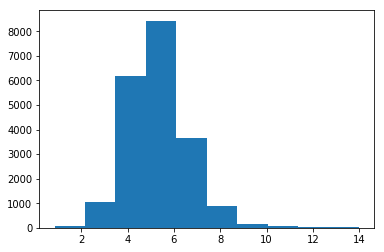

In [24]:
plt.hist(rooms_av_number[rooms_av_number<14])

In [25]:
def classification_by_rooms_number(row):
    if row['rooms_averige_number'] <= 2:
        return '<= 2'
    if row['rooms_averige_number'] <= 4:
        return '2 <= 4'
    if row['rooms_averige_number'] <= 6:
        return '4 <= 6'
    if row['rooms_averige_number'] <= 8:
        return '6 <= 8'    
    if row['rooms_averige_number'] <= 10:
        return '8 <= 10'  
    if row['rooms_averige_number'] <= 20:
        return '10 <= 20'     
    if row['rooms_averige_number'] <= 40:
        return '20 <= 40'    
    if row['rooms_averige_number'] <= 60:
        return '40 <= 60' 
    else:
        return '> 60'

In [26]:
housing['classification_by_rooms_number'] = housing.apply(classification_by_rooms_number, axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_averige_number,classification_by_rooms_number
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,6 <= 8
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,6 <= 8
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,8 <= 10
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,4 <= 6
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,6 <= 8


4 <= 6      12344
6 <= 8       4684
2 <= 4       2850
8 <= 10       497
10 <= 20      157
20 <= 40       58
<= 2           39
40 <= 60        7
> 60            4
Name: classification_by_rooms_number, dtype: int64


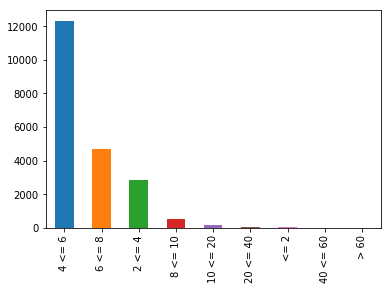

In [27]:
housing_classification_by_rooms = housing['classification_by_rooms_number'].value_counts()
print(housing_classification_by_rooms)
housing_classification_by_rooms.plot(kind='bar')